<div class="jumbotron" style="background:#00F3FF;" >
    <h1>Ad Click Dataset (Grey Atom Hackathon : Team 5)</h1> 
     <p> Predict the probability of whether an ad will get clicked or not.</p>
</div> 

### Team Members :
<div class="alert alert-success">
  <strong></strong>
  <li><p> Akshay Lakade</p></li>
  <li><p> Kailas D.</p></li>
  <li><p> Vivek Shingate</p></li>
          
</div>


### Use Case :




<div class="panel panel-default">
  <div class="panel-body">A leading affiliate network company from Europe wants to leverage machine learning to improve
(optimise) their conversion rates and eventually their topline. Their network is spread across
multiple countries in europe such as Portugal, Germany, France, Austria, Switzerland etc.
Affiliate network is a form of online marketing channel where an intermediary promotes products
/ services and earns commission based on conversions (click or sign up). The benefit
companies sees in using such affiliate channels is that, they are able to reach to audience which
doesn’t exist in their marketing reach.
The company wants to improve their CPC (cost per click) performance. A future insight about an
ad performance will give them enough headstart to make changes (if necessary) in their
upcoming CPC campaigns.
In this challenge, you have to predict the probability of whether an ad will get clicked or not.
</div>
</div>

### Data Set
https://drive.google.com/file/d/1oJCM7LJ5oCcI4PuQH6vTFypAzwsMA0Jz/view?usp=sh
aring

### Data Description
You are given three files to download: train.csv, test.csv and sample_submission.csv Variables
in this data set are anonymized due to privacy.
The training data is given for 10 days ( 10 Jan 2017 to 20 Jan 2017). The test data is given for
next 3 days.


### Features Given
- ID (Unique ID
- datetime (timestamp
- siteid 
- website id
- offerid (offer id {commission based offers})
- category (offer category)
- merchant (seller ID)
- countrycode (country where affiliates reach is present)
- browserid (browser used)
- devid (device used)
- click (target variable)

### Evaluation Metric :

Submission will be evaluated based on AUC-ROC score. Higher the better.

### Helpful techniques:

- Mean encoding of variables will help a lot
- Combine two, three, four variables and then generate mean encoding with output
variable. This will help in understanding user behavior and make it easier for ML models
to learn a variety of features.
- Use all standard machine learning models. GBMs and its variants should work well.
- Try different ensembling and stacking techniques to improve the score.

<div class="alert alert-danger">
  <strong>Coding!</strong> Let's begin.
</div>

Library importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Importing CSV file into dataframe

In [2]:
path = 'train.csv'
df   = pd.read_csv(path)

In [3]:
df1 = df.copy()
df.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,IDsrk7SoW,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,IDmMSxHur,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,IDVLNN0Ut,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,ID32T6wwQ,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0


Dropping ID column as it doesn't serve any purpose

In [4]:
df.pop('ID')
df1.drop(['ID'],axis=1,inplace=True)

### Lets begin with some EDA!

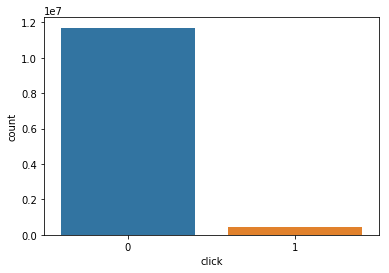

In [5]:
sns.countplot(x='click', data=df)

<div class="alert alert-warning">
  <strong>Dataset is imbalanced!</strong>  This is a case of rare event occurence.
</div>


# Undersampling - Solution to the problem

We'll focus on majority class and try to undersample it.

In [6]:
df[df.click==0]

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0
5,2017-01-14 12:08:49,2729292.0,961176,33638,47079934,e,Google Chrome,Mobile,0
6,2017-01-12 13:07:08,7007059.0,664666,68847,58604466,b,Edge,NaN,0
7,2017-01-13 05:58:13,7295565.0,144797,33638,23981625,b,Firefox,Mobile,0
8,2017-01-18 13:00:54,2116058.0,376073,15912,30860214,c,Edge,Tablet,0
9,2017-01-14 12:38:58,5329483.0,952097,89680,74363610,a,Edge,Tablet,0


In [7]:
df_0 = df[df.click==0]

Getting indices of majority class having any value missing so that we can remove them.

In [8]:
total = df_0.isnull().sum(axis=1).sort_values(ascending=False)
percent = (df_0.isnull().sum(axis=1)/df_0.isnull().count(axis=1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_missing_values_per_row', 'Percent'])
index = missing_data[missing_data.Percent > 0].index

In [9]:
df_1 = df[df.click==1]

In [10]:
total2 = df_1.isnull().sum(axis=1).sort_values(ascending=False)
percent2 = (df_1.isnull().sum(axis=1)/df_1.isnull().count(axis=1)).sort_values(ascending=False)
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total_missing_values_per_row2', 'Percent2'])
missing_data2[missing_data2.Percent2 > 0].index

Int64Index([ 5428908,  4031984,  5403458,  6304301,  8140332, 11199787,
             6092089, 11704473, 10136057,  4004474,
            ...
             1070587, 12003219, 11013552, 11013544,   672004,   671895,
            11559893, 11557898,  1551526,   680378],
           dtype='int64', length=119714)

First, we'll remove rows with click = 0 having any Nan values. 
We were able to remove 3,196,483 rows by this method.

In [11]:
df.drop(index,inplace=True)

In [12]:
df[df.click==0]

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
1,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
3,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0
5,2017-01-14 12:08:49,2729292.0,961176,33638,47079934,e,Google Chrome,Mobile,0
7,2017-01-13 05:58:13,7295565.0,144797,33638,23981625,b,Firefox,Mobile,0
8,2017-01-18 13:00:54,2116058.0,376073,15912,30860214,c,Edge,Tablet,0
9,2017-01-14 12:38:58,5329483.0,952097,89680,74363610,a,Edge,Tablet,0
10,2017-01-14 11:06:26,6436389.0,949077,76239,65017662,a,Edge,Tablet,0
11,2017-01-12 03:36:53,6401189.0,68770,43612,74868704,b,Google Chrome,Mobile,0
12,2017-01-18 14:52:22,6139730.0,781977,97863,56008048,b,Mozilla Firefox,Desktop,0


Now we are left with 8,941,327 datapoints. Lets check if its balanced or not.

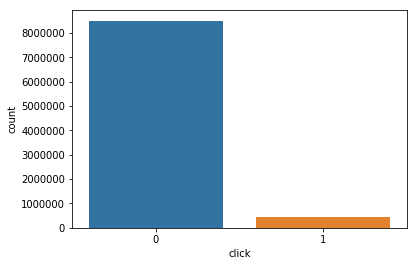

In [13]:
sns.countplot(x='click', data=df)

<div class="alert alert-danger">
  <strong>Alas!</strong> It still is an imbalanced dataset!
</div>


- Some insight before undersampling which would help us to impute missing values later

Finding realtion between browserid and devid for missing data imputation.

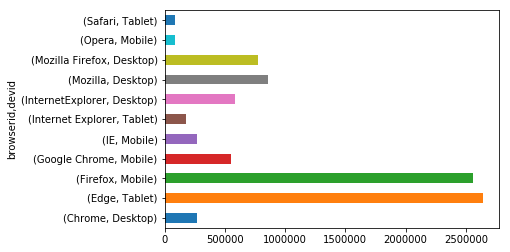

In [14]:
df.groupby(['browserid', 'devid']).click.count().plot(kind='barh')

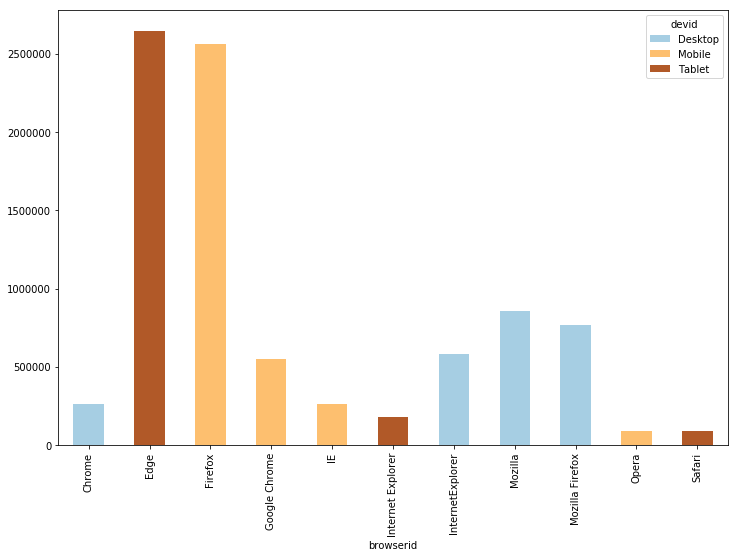

In [15]:
crosstab = pd.crosstab(index=df["browserid"], columns=df["devid"])
# crosstab
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

<div class="alert alert-success">
  <strong>Yay!</strong> Clearly, dev id depends on browserid. We would impute devid based on browserid.
</div>


Capturing unique categories in each column before undersampling

In [16]:
Z = df.nunique()

In [17]:
Z.sort_values()

click               2
devid               3
countrycode         6
browserid          11
category          271
merchant          697
siteid         219014
datetime       513374
offerid        809977
dtype: int64

**Random Undersampling** for majority class

In [18]:
ones = int(len(df[df['click'] == 1])*1.5)

zeros = df[df.click == 0].index

random_indices = np.random.choice(zeros,ones,replace=False)

one_indices = df[df.click == 1].index

under_sample_indices = np.concatenate([one_indices,random_indices])

under_sample = df.loc[under_sample_indices]

df = under_sample

In [19]:
df

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
13,2017-01-15 21:43:34,6718234.0,433512,43612,57517812,c,NaN,Desktop,1
16,2017-01-10 15:28:24,469603.0,385750,93286,7122654,a,Google Chrome,Mobile,1
35,2017-01-14 19:01:18,5369414.0,513860,27655,92826840,f,Google Chrome,Mobile,1
67,2017-01-11 19:21:58,6005717.0,956737,1678,60293830,f,InternetExplorer,Desktop,1
90,2017-01-16 14:29:36,7979331.0,501647,68947,58321067,f,Mozilla,Desktop,1
153,2017-01-17 00:04:53,2092870.0,400635,43897,46512126,c,Firefox,Mobile,1
187,2017-01-20 12:49:37,94250.0,527842,23576,16150900,c,Safari,Tablet,1
205,2017-01-15 01:00:05,7885100.0,913591,15912,7181598,d,Firefox,Mobile,1
208,2017-01-15 06:30:23,9335708.0,188867,3643,555603,d,NaN,Mobile,1
222,2017-01-16 02:56:27,5571806.0,103249,40339,43452411,a,InternetExplorer,Desktop,1


Lets have a look at the undersampled data distribution.

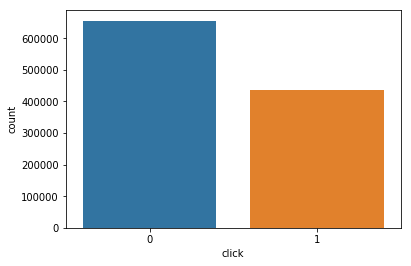

In [20]:
sns.countplot(x='click', data=df)

<div class="alert alert-success">
  <strong>Nice!</strong> This distribution now seems good. Lets analyse whether we were able to retain most of categories.
</div>

- Unique categories left in each column after undersampling.

In [21]:
X = df.nunique()

In [22]:
X.sort_values()

click               2
devid               3
countrycode         6
browserid          11
category          271
merchant          697
siteid         210497
offerid        384926
datetime       435480
dtype: int64

# Filling out missing values

###  1.  First for *browserid*

Browserid is to be filled based on country. Lets check missing browser values countrywise.

In [23]:
print("For country A:",df[df.countrycode=='a']['browserid'].isnull().sum())
print("For country B:",df[df.countrycode=='b']['browserid'].isnull().sum())
print("For country C:",df[df.countrycode=='c']['browserid'].isnull().sum())
print("For country D:",df[df.countrycode=='d']['browserid'].isnull().sum())
print("For country E:",df[df.countrycode=='e']['browserid'].isnull().sum())
print("For country F:",df[df.countrycode=='f']['browserid'].isnull().sum())

For country A: 1088
For country B: 1048
For country C: 10778
For country D: 6645
For country E: 1089
For country F: 1066


- Lets try to find the mode value of browser country-wise using plots.

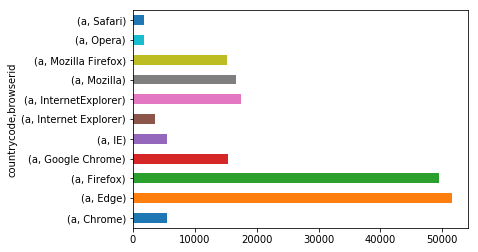

In [24]:
df[df.countrycode=='a'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

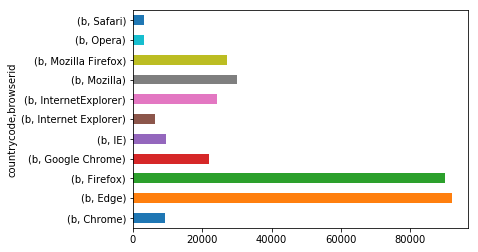

In [25]:
df[df.countrycode=='b'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

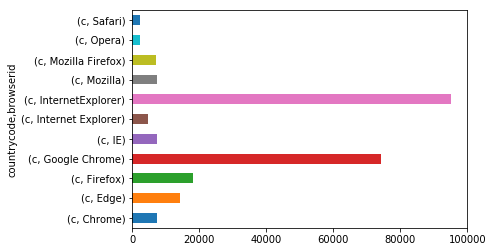

In [26]:
df[df.countrycode=='c'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

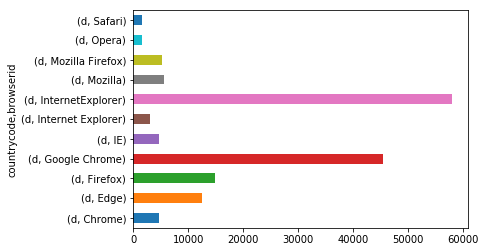

In [27]:
df[df.countrycode=='d'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

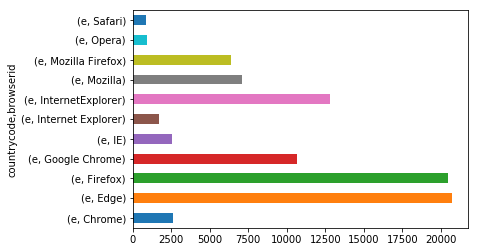

In [28]:
df[df.countrycode=='e'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

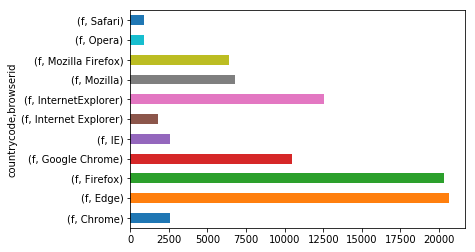

In [29]:
df[df.countrycode=='f'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

Imputing missing vlaues for browserid

In [30]:
df.loc[(df['countrycode']=='a') & (df['browserid'].isnull()) ,'browserid']='Edge'
df.loc[(df['countrycode']=='b') & (df['browserid'].isnull()) ,'browserid']='Edge'
df.loc[(df['countrycode']=='c') & (df['browserid'].isnull()) ,'browserid']='InternetExplorer'
df.loc[(df['countrycode']=='d') & (df['browserid'].isnull()) ,'browserid']='InternetExplorer'
df.loc[(df['countrycode']=='e') & (df['browserid'].isnull()) ,'browserid']='Edge'
df.loc[(df['countrycode']=='f') & (df['browserid'].isnull()) ,'browserid']='InternetExplorer'

In [31]:
print("For country A:",df[df.countrycode=='a']['browserid'].isnull().sum())
print("For country B:",df[df.countrycode=='b']['browserid'].isnull().sum())
print("For country C:",df[df.countrycode=='c']['browserid'].isnull().sum())
print("For country D:",df[df.countrycode=='d']['browserid'].isnull().sum())
print("For country E:",df[df.countrycode=='e']['browserid'].isnull().sum())
print("For country F:",df[df.countrycode=='f']['browserid'].isnull().sum())

For country A: 0
For country B: 0
For country C: 0
For country D: 0
For country E: 0
For country F: 0


### 2. Then for browserid

Filling up devid based on Browser feature

In [32]:
df.loc[((df['browserid']=='Safari')|(df['browserid']=='Edge')|(df['browserid']=='Internet Explorer')) & (df['devid'].isnull()) ,'devid']='Tablet'
df.loc[((df['browserid']=='Opera')|(df['browserid']=='IE')|(df['browserid']=='Firefox')|(df['browserid']=='Google Chrome')) & (df['devid'].isnull()) ,'devid']='Mobile'
df.loc[((df['browserid']=='InternetExplorer')|(df['browserid']=='Mozilla')|(df['browserid']=='Mozilla Firefox')|(df['browserid']=='Chrome')) & (df['devid'].isnull()) ,'devid']='Desktop'

In [33]:
df[df['devid'].isnull()]

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click


### Feature Engineering : Extracting time information from datetime column

In [34]:
df['new_time'] = [d.split(' ')[1] for d in df['datetime']]

In [35]:
def convertTimeToQuarter(time):
    str_time = str(time)
    hour = str_time.split(':')[0]
    quarter = ''
    if int(hour) < 6:
        quarter = 'phase1'
    elif int(hour) < 12: 
        quarter = 'phase2'
    elif int(hour) < 18: 
        quarter = 'phase3'
    else:
        quarter = 'phase4'
    return quarter

In [36]:
df['time_phase'] = [convertTimeToQuarter(d) for d in df['new_time']]

In [37]:
df.iloc[:,[0,9,10]]

,datetime,new_time,time_phase
13,2017-01-15 21:43:34,21:43:34,phase4
16,2017-01-10 15:28:24,15:28:24,phase3
35,2017-01-14 19:01:18,19:01:18,phase4
67,2017-01-11 19:21:58,19:21:58,phase4
90,2017-01-16 14:29:36,14:29:36,phase3
153,2017-01-17 00:04:53,00:04:53,phase1
187,2017-01-20 12:49:37,12:49:37,phase3
205,2017-01-15 01:00:05,01:00:05,phase1
208,2017-01-15 06:30:23,06:30:23,phase2
222,2017-01-16 02:56:27,02:56:27,phase1


### Popping old columns as they serve no purpose

In [38]:
df.pop('datetime')
df.pop('new_time')

13          21:43:34
16          15:28:24
35          19:01:18
67          19:21:58
90          14:29:36
153         00:04:53
187         12:49:37
205         01:00:05
208         06:30:23
222         02:56:27
252         13:25:22
258         20:05:13
299         08:31:09
364         14:30:41
380         17:08:53
389         14:50:30
398         17:38:39
403         13:51:39
446         14:38:20
455         07:27:45
457         01:07:19
536         13:52:35
591         22:46:09
655         17:58:43
666         15:56:02
744         17:09:00
770         16:50:39
815         11:38:31
830         10:24:26
936         22:38:43
              ...   
9734449     15:33:13
11126209    07:04:55
1380329     12:26:38
10366274    11:46:01
4209292     17:30:08
110236      12:00:28
9499195     13:45:23
2591358     15:14:53
3694990     13:36:16
8318822     14:40:46
3614621     15:00:03
1919522     15:24:45
9235855     16:16:03
3643883     17:20:18
9068723     10:11:51
9862261     14:33:29
242849      1

### 3. Lastly, forward filling for missing siteid

In [39]:
df.siteid.fillna(method='ffill', inplace=True)

Before proceeding lets check if there are any missing values left.

In [40]:
df.isnull().sum()

siteid         0
offerid        0
category       0
merchant       0
countrycode    0
browserid      0
devid          0
click          0
time_phase     0
dtype: int64

- Lets have a look at the different browsers present in the data. Clearly, we can merge some of them together.

In [41]:
df.browserid.value_counts()

InternetExplorer     238717
Edge                 215068
Firefox              213124
Google Chrome        177922
Mozilla               73692
Mozilla Firefox       67306
Chrome                32115
IE                    32042
Internet Explorer     21372
Opera                 10862
Safari                10815
Name: browserid, dtype: int64

### Clubbing similar browsers together

In [42]:
#Merging all similar browsers

df['browserid']=df.browserid.str.replace("InternetExplorer","IE")
df['browserid']=df.browserid.str.replace("Internet Explorer","IE")

df['browserid']=df.browserid.str.replace("Mozilla Firefox","Firefox")
df['browserid']=df.browserid.str.replace("Mozilla","Firefox")

df['browserid']=df.browserid.str.replace("Google Chrome","Chrome")

In [43]:
df.browserid.value_counts()

Firefox    354122
IE         292131
Edge       215068
Chrome     210037
Opera       10862
Safari      10815
Name: browserid, dtype: int64

<div class="alert alert-success">
  <strong>Perfect!</strong> This seems correct !
</div>

In [44]:
df

,siteid,offerid,category,merchant,countrycode,browserid,devid,click,time_phase
13,6718234.0,433512,43612,57517812,c,IE,Desktop,1,phase4
16,469603.0,385750,93286,7122654,a,Chrome,Mobile,1,phase3
35,5369414.0,513860,27655,92826840,f,Chrome,Mobile,1,phase4
67,6005717.0,956737,1678,60293830,f,IE,Desktop,1,phase4
90,7979331.0,501647,68947,58321067,f,Firefox,Desktop,1,phase3
153,2092870.0,400635,43897,46512126,c,Firefox,Mobile,1,phase1
187,94250.0,527842,23576,16150900,c,Safari,Tablet,1,phase3
205,7885100.0,913591,15912,7181598,d,Firefox,Mobile,1,phase1
208,9335708.0,188867,3643,555603,d,IE,Mobile,1,phase2
222,5571806.0,103249,40339,43452411,a,IE,Desktop,1,phase1


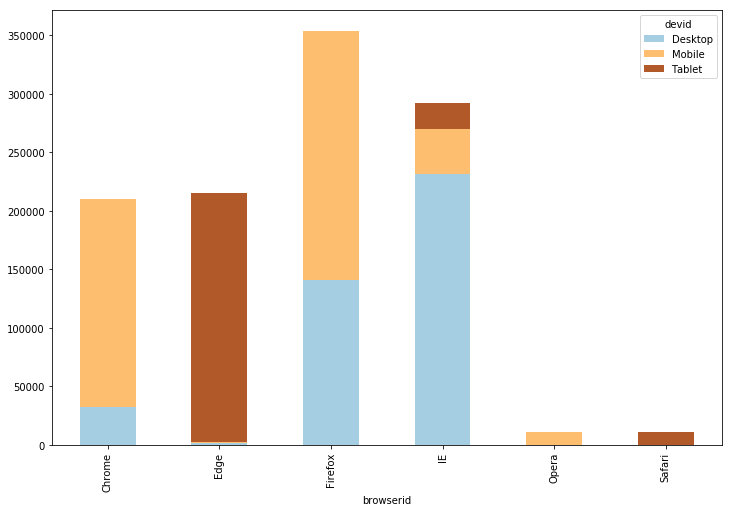

In [45]:
crosstab = pd.crosstab(index=df["browserid"], columns=df["devid"])
# crosstab
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

### Target encoding using scikit learn 

In [46]:
# X_train = df1[[col for col in df1.columns if col != 'click']]
# y_train = df1['click']
# from category_encoders.target_encoder import TargetEncoder
# MeanEncoder = TargetEncoder(cols=['siteid','offerid','category','merchant','countrycode','browserid','devid'])
# MeanEncoder.fit(X_train,y_train)
# df3 = MeanEncoder.transform(X_train)
# X_train = X_train.head()
# y_train = y_train.head()

### Mean Encoding of features

In [47]:
time_phase = pd.crosstab(index=df["time_phase"], columns=df["click"])
time_phase

click,0,1
time_phase,,
phase1,28100,26182
phase2,218400,125280
phase3,368659,167459
phase4,40662,118293


In [48]:
time_phase['ME']=time_phase[1]/(time_phase[1]+time_phase[0])
time_phase

click,0,1,ME
time_phase,,,
phase1,28100,26182,0.482333
phase2,218400,125280,0.364525
phase3,368659,167459,0.312355
phase4,40662,118293,0.744192


In [49]:
time_phase.pop(0)
time_phase.pop(1)

time_phase
phase1     26182
phase2    125280
phase3    167459
phase4    118293
Name: 1, dtype: int64

In [50]:
time_phase = pd.Series(time_phase.ME)

In [51]:
df['time_phase'] = df['time_phase'].map(time_phase)

In [52]:
browserid = pd.crosstab(index=df["browserid"], columns=df["click"])
browserid

click,0,1
browserid,,
Chrome,52171,157866
Edge,203369,11699
Firefox,321138,32984
IE,65832,226299
Opera,6704,4158
Safari,6607,4208


In [53]:
browserid['ME']=browserid[1]/(browserid[1]+browserid[0])
browserid

click,0,1,ME
browserid,,,
Chrome,52171,157866,0.751610
Edge,203369,11699,0.054397
Firefox,321138,32984,0.093143
IE,65832,226299,0.774649
Opera,6704,4158,0.382802
Safari,6607,4208,0.389089


In [54]:
browserid.pop(0)
browserid.pop(1)

browserid
Chrome     157866
Edge        11699
Firefox     32984
IE         226299
Opera        4158
Safari       4208
Name: 1, dtype: int64

In [55]:
browserid = pd.Series(browserid.ME)

In [56]:
df['browserid'] = df['browserid'].map(browserid)

In [57]:
devid = pd.crosstab(index=df["devid"], columns=df["click"])
devid
devid['ME']=devid[1]/(devid[1]+devid[0])
devid
devid.pop(0)
devid.pop(1)
devid = pd.Series(devid.ME)
df['devid'] = df['devid'].map(devid)

In [58]:
countrycode = pd.crosstab(index=df["countrycode"], columns=df["click"])
countrycode
countrycode['ME']=countrycode[1]/(countrycode[1]+countrycode[0])
countrycode
countrycode.pop(0)
countrycode.pop(1)
countrycode = pd.Series(countrycode.ME)
df['countrycode'] = df['countrycode'].map(countrycode)

In [59]:
siteid = pd.crosstab(index=df["siteid"], columns=df["click"])
siteid
siteid['ME']=siteid[1]/(siteid[1]+siteid[0])
siteid
siteid.pop(0)
siteid.pop(1)
siteid = pd.Series(siteid.ME)
df['siteid'] = df['siteid'].map(siteid)

In [60]:
category = pd.crosstab(index=df["category"], columns=df["click"])
category
category['ME']=category[1]/(category[1]+category[0])
category
category.pop(0)
category.pop(1)
category = pd.Series(category.ME)
df['category'] = df['category'].map(category)

In [61]:
merchant = pd.crosstab(index=df["merchant"], columns=df["click"])
merchant
merchant['ME']=merchant[1]/(merchant[1]+merchant[0])
merchant
merchant.pop(0)
merchant.pop(1)
merchant = pd.Series(merchant.ME)
df['merchant'] = df['merchant'].map(merchant)

In [62]:
offerid = pd.crosstab(index=df["offerid"], columns=df["click"])
offerid
offerid['ME']=offerid[1]/(offerid[1]+offerid[0])
offerid
offerid.pop(0)
offerid.pop(1)
offerid = pd.Series(offerid.ME)
df['offerid'] = df['offerid'].map(offerid)

### Lets have a final glance at the data before proceeding with training the model.

In [63]:
df

,siteid,offerid,category,merchant,countrycode,browserid,devid,click,time_phase
13,1.000000,0.333333,0.468342,0.632857,0.869308,0.774649,0.563108,1,0.744192
16,0.400000,1.000000,0.338487,0.446690,0.116570,0.751610,0.421941,1,0.312355
35,1.000000,1.000000,0.267815,0.628788,0.251711,0.751610,0.421941,1,0.744192
67,1.000000,0.400000,0.455515,0.640625,0.251711,0.774649,0.563108,1,0.744192
90,1.000000,0.666667,0.302797,0.300900,0.251711,0.093143,0.563108,1,0.312355
153,1.000000,0.200000,0.381315,0.392265,0.869308,0.093143,0.421941,1,0.482333
187,0.500000,0.983607,0.396318,0.338280,0.869308,0.389089,0.090842,1,0.312355
205,1.000000,0.909091,0.241589,0.388934,0.801381,0.093143,0.421941,1,0.482333
208,0.088235,0.632653,0.513267,0.458629,0.801381,0.774649,0.421941,1,0.364525
222,0.484043,0.098719,0.197673,0.102367,0.116570,0.774649,0.563108,1,0.482333


### Splitting of data into X and y

In [64]:
feature_cols = ['siteid', 'offerid', 'category', 'merchant','countrycode','browserid','devid','time_phase']
X = df[feature_cols]
y = df.click

### Train-Test-Validation Split

In [65]:
from sklearn.model_selection import train_test_split

Here we want to split our data into 3 sets in the ratio (70:20:10). 
- Train (70%)
- Test (20%)
- Validation (10%)

This is achieved using 2 fold train test split. First, we split the data into train and temp set in the ratio 7:3. Later, temp set is split in the ration 2:1 therby giving us 70:20:10 ratio.

In [66]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size = 0.3)
X_test,X_valid,y_test,y_valid = train_test_split(X_temp,y_temp,test_size = 0.33)

### Training the model

First, we'll train the model on simple logistic regression and check the results.

#### Simple logistic regression using default polynomial features:

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [68]:
logistic_regressor = LogisticRegression()
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', logistic_regressor)])
pipeline.fit(X_train, y_train)

/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('add_poly_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logistic_regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [69]:
y_pred=pipeline.predict(X_test)

#### Model Evaluation for simple logistic regression

- Predictions with confidence score

In [70]:
pred = pd.DataFrame(pipeline.predict(X_test))

In [71]:
prob = pd.DataFrame(pipeline.predict_proba(X_test))

In [72]:
final = pd.concat([pred,prob], axis=1)
final.columns = ['Prediction','Confidence_score_0','Confidence_score_1']
final

,Prediction,Confidence_score_0,Confidence_score_1
0,0,0.950331,0.049669
1,1,0.004979,0.995021
2,0,0.999610,0.000390
3,1,0.000010,0.999990
4,0,0.999708,0.000292
5,0,0.993874,0.006126
6,1,0.000020,0.999980
7,1,0.000081,0.999919
8,1,0.002033,0.997967
9,0,0.653130,0.346870


- Accuracy

In [73]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9778015475648612


- AUC/ROC score

In [74]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.9764530458035686

- Confusion matrix

In [75]:
# Applying confusion matrix on above data
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test,y_pred))
cm

,0,1
0,129471,2207
1,2670,85352


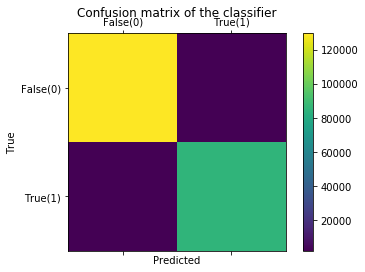

In [76]:
import matplotlib.pyplot as plt
# print(cm)
labels = ['False(0)', 'True(1)']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

- F1 score

In [77]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9722236460664877

Now lets try tweaking the model using some regulariztion techniques and see how well it does.

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', LogisticRegression(random_state = 9))])

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
params = {'add_poly_features__degree'   :range(0,4),
          'logistic_regression__penalty':['l1','l2'],
          'logistic_regression__C'      :[1,0.1,0.01,0.001]}
rand_search = RandomizedSearchCV(estimator = pipeline,param_distributions = params, n_iter=10)
rand_search.fit(X_train,y_train)
y_prediction = rand_search.predict(X_test)

/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/l

In [80]:
cross_val_score(rand_search.best_estimator_,X_train,y_train)

/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.97972883, 0.98027376, 0.98018358])